In [33]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [88]:
df_features = pd.read_excel(os.path.join("TCGA_Run_2014_91cases_features_UChicago_V2010_MR_Workstation.xls"))
df_features.columns = [column.strip().replace(" ", "_") for column in df_features.columns]
df_features.rename(columns={"Lesion_Name": "Patients_id"}, inplace=True)
df_features["Patients_id"] = df_features.Patients_id.apply(lambda x: "-".join(x.split("-")[:3]))
df_features.set_index("Patients_id", inplace=True)
df_features.head()

,Maximum_enhancement_(K1),Time_to_peak_(K2),Uptake_rate_(K3),Washout_rate_(K4),Curve_shape_index_(K5),E1_(K6),Signal_Enhancement_Ratio_(SER)_(K7),Maximum_enhancement-variance_(E1),Enhancement-Variance_Time_to_Peak_(E2),Enhancement-variance_Increasing_Rate_(E3),...,Irregularity_(G2),Margin_Sharpness_(M1),Variance_of_Margin_Sharpness_(M2),Variance_of_Radial_Gradient_Histogram_(vRGH)_(M3),Size/Lesion_volume_(S1),Effective_Diameter_(S2),Surface_Area_(S3),Surface_Area_to_Volume_ratio_(G3),Volume_of_most_enhancing_voxels_(S4),Maximum_Diameter_(S5)
Patients_id,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A03M,1.602573,145.433,0.011019,0.000809,-0.099998,1.550204,1.111109,0.125963,60.000,0.002099,...,0.642163,0.188643,0.000143,0.014881,3139.6540,18.16747,2897.7040,0.922937,22.15705,27.60382
TCGA-AO-A03V,4.072152,144.752,0.028132,0.001510,-0.007311,3.973258,1.007365,4.054312,229.504,0.017666,...,0.452342,0.266607,0.000371,0.011217,1122.5800,12.89455,953.7904,0.849641,111.70860,21.31066
TCGA-AO-A0J9,1.303264,168.383,0.007740,0.000667,-0.146959,1.273733,1.172277,0.534411,60.000,0.008907,...,0.715572,0.269997,0.000323,0.005211,8211.5000,25.03079,6920.3380,0.842762,236.23630,41.33787
TCGA-AO-A0JI,0.758630,60.000,0.012644,0.000479,-0.150482,0.758630,1.177138,0.037956,298.418,0.000127,...,0.432493,0.179068,0.000407,0.020553,569.5309,10.28426,585.4972,1.028034,122.69640,11.39449
TCGA-AO-A0JM,3.353556,60.000,0.055893,0.000920,-0.080066,3.353556,1.087034,2.330160,60.000,0.038836,...,0.805132,0.314553,0.000409,0.004073,19709.4700,33.51394,18107.5700,0.918724,245.36130,68.62797


In [61]:
df_features.shape

(91, 36)

In [89]:
df_clinical = pd.read_excel(os.path.join("brca-clinicalforwiki.xls"))
df_clinical.rename(columns={"bcr_patient_barcode": "Patients_id"}, inplace=True)
df_clinical.set_index("Patients_id", inplace=True)
df_clinical.head()

,age_at_initial_pathologic_diagnosis,ajcc_cancer_metastasis_stage_code,ajcc_neoplasm_disease_lymph_node_stage,ajcc_neoplasm_disease_stage,ajcc_tumor_stage_code,anatomic_organ_subdivision,axillary_lymph_node_stage_method_type,breast_cancer_optical_measurement_histologic_type,breast_cancer_surgery_margin_status,breast_carcinoma_estrogen_receptor_status,...,lymph_node_examined_count,margin_status,menopause_status,number_of_lymphnodes_positive_by_he,patient_id,pretreatment_history,prior_diagnosis,race,tissue_source_site,vital_status
Patients_id,,,,,,,,,,,,,,,,,,,,,
TCGA-E2-A107,54,M0,N2a,Stage IIIA,T3,Right Upper Inner Quadrant,Sentinel lymph node biopsy plus axillary disse...,Infiltrating Lobular,[Not Available],Positive,...,27,Negative,Post (prior bilateral ovariectomy OR >12 mo si...,4,A107,NO,NO,WHITE,E2,LIVING
TCGA-E2-A108,64,M0,N2a,Stage IIIA,T2,Right Upper Outer Quadrant,[Not Available],Infiltrating Ductal,[Not Available],Positive,...,27,Negative,Post (prior bilateral ovariectomy OR >12 mo si...,4,A108,NO,NO,WHITE,E2,LIVING
TCGA-E2-A109,64,M0,N0 (i-),Stage IIA,T2,Right Upper Outer Quadrant,Sentinel node biopsy alone,Infiltrating Ductal,[Not Available],Positive,...,6,Negative,Post (prior bilateral ovariectomy OR >12 mo si...,0,A109,NO,NO,WHITE,E2,LIVING
TCGA-E2-A10B,67,M0,N1a,Stage IIB,T2,Left Lower Outer Quadrant,Sentinel lymph node biopsy plus axillary disse...,Infiltrating Ductal,[Not Available],Positive,...,28,Close,Post (prior bilateral ovariectomy OR >12 mo si...,2,A10B,NO,NO,WHITE,E2,LIVING
TCGA-E2-A10C,54,M0,N1a,Stage IIB,T2,Left Upper Outer Quadrant,Sentinel lymph node biopsy plus axillary disse...,Infiltrating Ductal,[Not Available],Positive,...,13,Negative,Post (prior bilateral ovariectomy OR >12 mo si...,1,A10C,NO,NO,WHITE,E2,LIVING


In [62]:
df_clinical.shape

(334, 24)

In [90]:
ER_data = df_clinical[["breast_carcinoma_estrogen_receptor_status"]].merge(df_features, left_index=True, right_index=True)
ER_data.rename(columns={"breast_carcinoma_estrogen_receptor_status": "ER"}, inplace=True)
ER_data.shape

(91, 37)

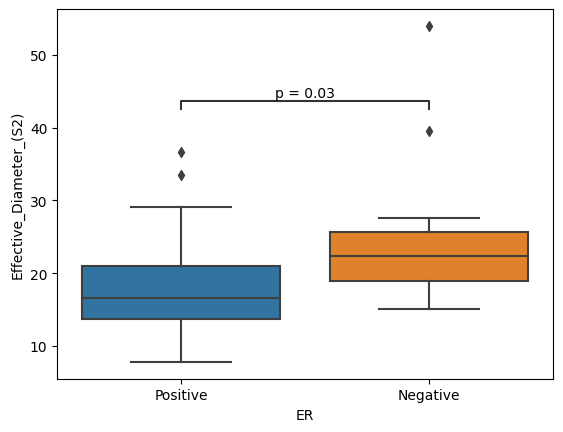

In [91]:
ER_S2 = sns.boxplot(ER_data, x="ER", y="Effective_Diameter_(S2)")
p_value = add_stat_annotation(ER_S2, data=data, x="ER", y="Effective_Diameter_(S2)", 
                                       box_pairs=[("Positive", "Negative")], 
                                       test="Mann-Whitney", text_format="simple", verbose=0)

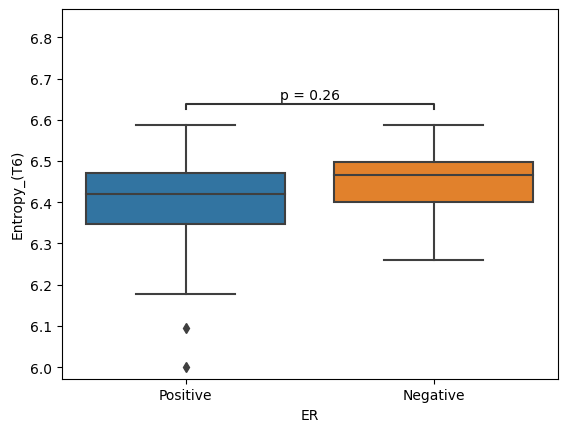

In [92]:
ER_S2 = sns.boxplot(ER_data, x="ER", y="Entropy_(T6)")
p_value = add_stat_annotation(ER_S2, data=data, x="ER", y="Entropy_(T6)", 
                                       box_pairs=[("Positive", "Negative")], 
                                       test="Mann-Whitney", text_format="simple", verbose=0)

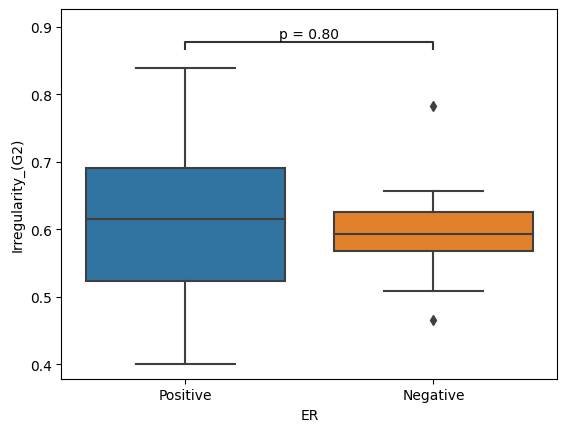

In [60]:
ER_S2 = sns.boxplot(ER_data, x="ER", y="Irregularity_(G2)")
p_value = add_stat_annotation(ER_S2, data=data, x="ER", y="Irregularity_(G2)", 
                                       box_pairs=[("Positive", "Negative")], 
                                       test="Mann-Whitney", text_format="simple", verbose=0)

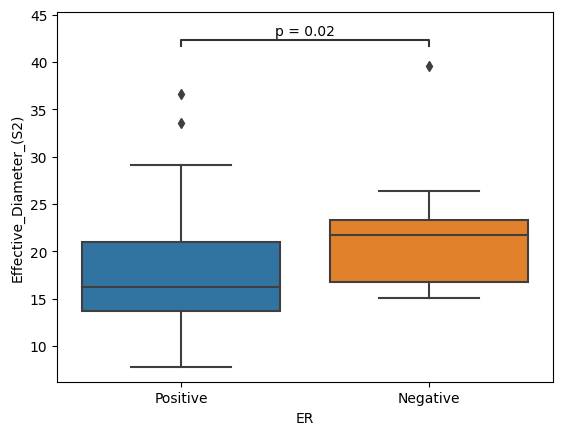

In [54]:
ER_S2 = sns.boxplot(ER_data, x="ER", y="Effective_Diameter_(S2)")
p_value = add_stat_annotation(ER_S2, data=data, x="ER", y="Effective_Diameter_(S2)", 
                                       box_pairs=[("Positive", "Negative")], 
                                       test="t-test_ind", text_format="simple", verbose=0)

In [90]:
ER_data = df_clinical[["breast_carcinoma_estrogen_receptor_status"]].merge(df_features, left_index=True, right_index=True)
ER_data.rename(columns={"breast_carcinoma_estrogen_receptor_status": "ER"}, inplace=True)
ER_data.shape

(91, 37)